In [9]:
#모듈 임포트!
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [2]:
#데이터 shpae 확인
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'anckle boot']

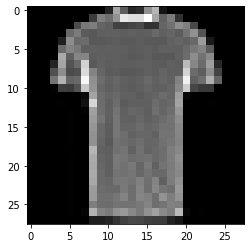

0
[[  0   0   0   0   0   0   0   0   0   0  36 165  93  41  48 145 181  20
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  61 126 110 146 231 223 221 255 165  98
  123  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  76 121 125 100  95  65  63  68  73  50  51 101
  113 141 128  73   0   0   0   0   0   0]
 [  0   0   0   0   0 105 123  91  88  95  96  96  93  96  93  95 106  96
  101  93 115 145  83   0   0   0   0   0]
 [  0   0   0   0  31 141 105 108  88  90  91  93  90  90  93  90  90  90
   98 101  96 105 155  25   0   0   0   0]
 [  0   0   0   0 105 131 120  95  98  95  96  95  95  91  93  95  91  96
   96  95 106 120 131  91   0   0   0   0]
 [  0   0   0   0 170  95 133 133  93  96  95  95  93  90  91  95  88  88
   88  96 108 141 115 138   0   0   0   0]
 [  0   0   0  36 165  83 106 210  90  98  93  95  93  93  95  96  93  91
   96  93 186 135 108 158  40   0   0   0]
 [  0   0   0  80 141  75  80 218 131 101  91  93  88  90  91 

In [4]:
my_sample = np.random.randint(60000)
#X_train의 형태는 28 * 28
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()

print(Y_train[my_sample])
print(X_train[my_sample])

#0~250까지 값(색상을 나타냄)이 28개로 표현 즉, 픽셀 값임
#imshow가 임의로 색을 입혀줌
#28 X 28 2차원데이터로 표현

In [5]:
#타겟을 원핫인코딩 이용하여 라벨을 10개짜리로 변환

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
#원핫인코딩 형태로 변환한 것 확인
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 모델 예시

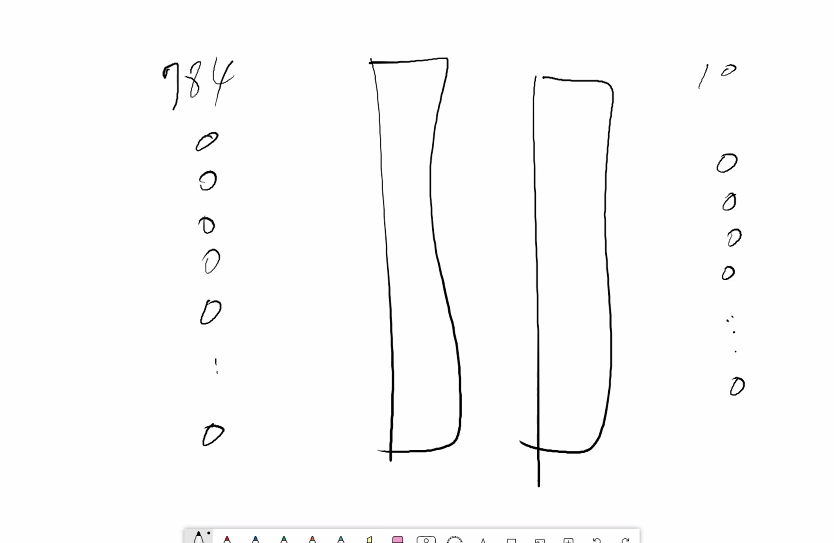

CNN 모델을 사용할 때는 reshape 할 때는 필요 없음  
이미지 자체를 삽입하기 때문  
단, 스케일링은 진행

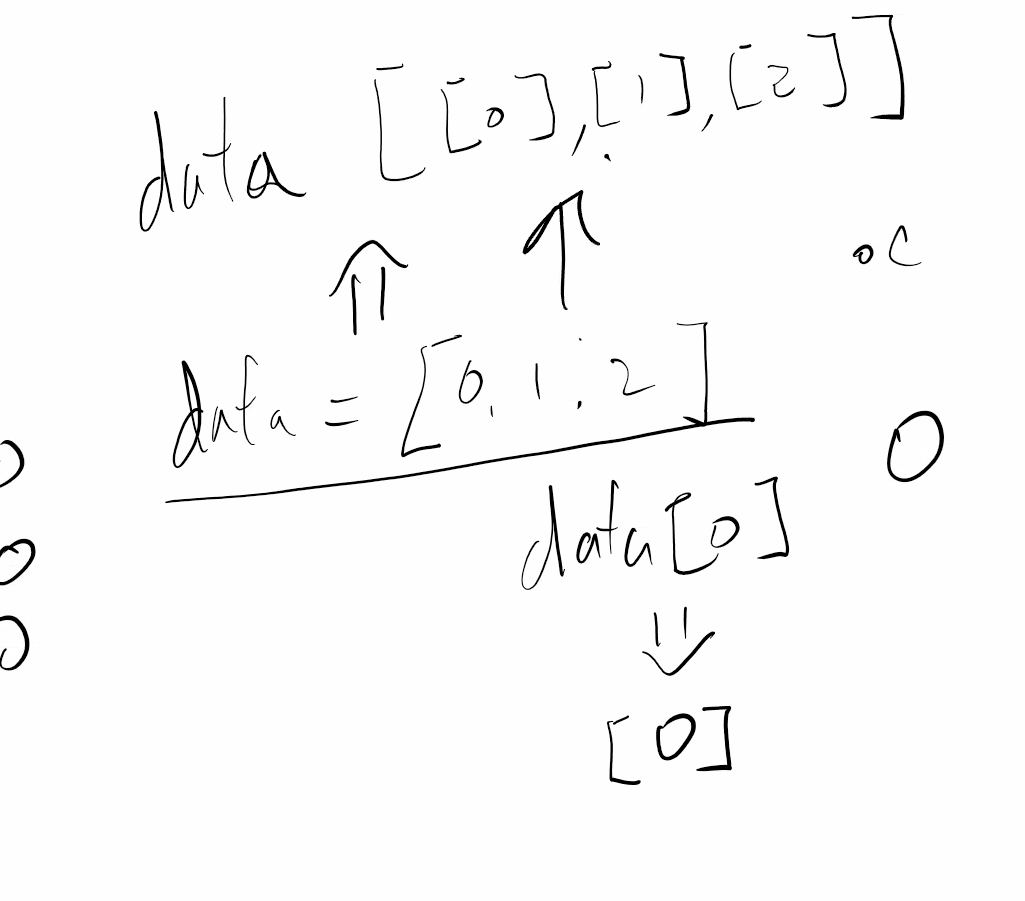

데이터를 모델에 건네줄 때 입력 레이어 갯수만큼 묶어서 리스트 형식으로 주어야하기 때문에 데이터의 차원을 늘려주어 건네준다.  
위 그림 참고. [0, 1, 2]의 데이터에서 0의 데이터를 주고 싶으면 [[0], [1], [2]] 형식으로 바꾸고 건네준다  
  
[1,2, ...,14] 데이터를 reshape(7,2)하면 2개씩 묶어 7개로 만듦.  
몇 개로 만들 수 있는지 모른다면 reshape(-1,2)하면 2개씩 묶어서 만들 수 있는만큼 자동으로 만들어줌  
하지만 (-1,3)처럼 수가 맞지 않게 묶으면 오류 발생!!

In [7]:
#데이터 스케일링
x_train = X_train / 255.0
x_test = X_test / 255.0

#CNN을 이용할 때 데이터는 3차원이 되어야함
#위의 설명처럼 데이터 숫자는 동일하되 차원을 늘려주어 리스트로 한 번 묶어줌
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [25]:
#모델 생성

#CNN 사용시 reshape을 하여 한 줄로 데이터를 늘리면 고유의 위치 정보가 사라져서
#reshape하지 않고 그대로 이용할 수 있는 레이어를 생성

#앞단에 Conv2D와 MaxPool2D를 원하는만큼 쌓고 Dense 레이어로 가기전에 Flatten 레이어를 쌓음

model = Sequential()
#padding 값에 same을 주면 입력 이미지와 출력 이미지 크기와 같이 조절해줌 (=원본 사이즈와 동일하게 만들어줌)
#색깔이 있을 시 rgb값인 맨 뒤 값이 3이 됨
#kernel은 필터이다. 학습된 필터가 이미지의 특성을 찾아 구분해줌
#첫 파라미터는 커널의 갯수
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
#pooling이란 커널 안의 여러 값 중 가장 큰 값을 남김
#여기서 pool_size가 (2,2)면 2X2 사이즈 내에서 가장 큰 값을 찾음
#여기서의 padding = 'same'은 pool_size로 찾을 때 부족한 부분을 임의로 패딩을 씌워서 찾아줌
#특히, 가장자리의 정보가 사라지기 때문에 그것을 방지하기 위해 패딩을 사용
model.add(MaxPool2D(padding = 'same', pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(padding = 'same', pool_size = (2, 2)))
#Flatten은 최종 출력된 새로운 이미지를 한 줄로 reshape해주는 역할
model.add(Flatten())

#Dropout은 Flatten 다음에
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1568)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

# 파라미터 값 계산
1. conv2d_13 (Conv2D) : (3X3[커널사이즈]+1[바이어스])X32[커널 개수] = 320 
2. max_pooling2d_12 : 파라미터 X
3. conv2d_14 (Conv2D) : ((3X3)[커널사이즈]X32[커널개수]+1[바이어스])
4. max_pooling2d_13, flatten_5 (Flatten), dropout_3 (Dropout)는 파라미터 X
5. dense_15 (Dense)
6. dense_16 (Dense)

# 커널(필터) 학습
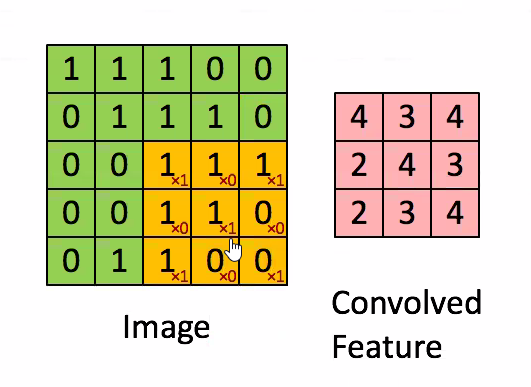

#풀링  
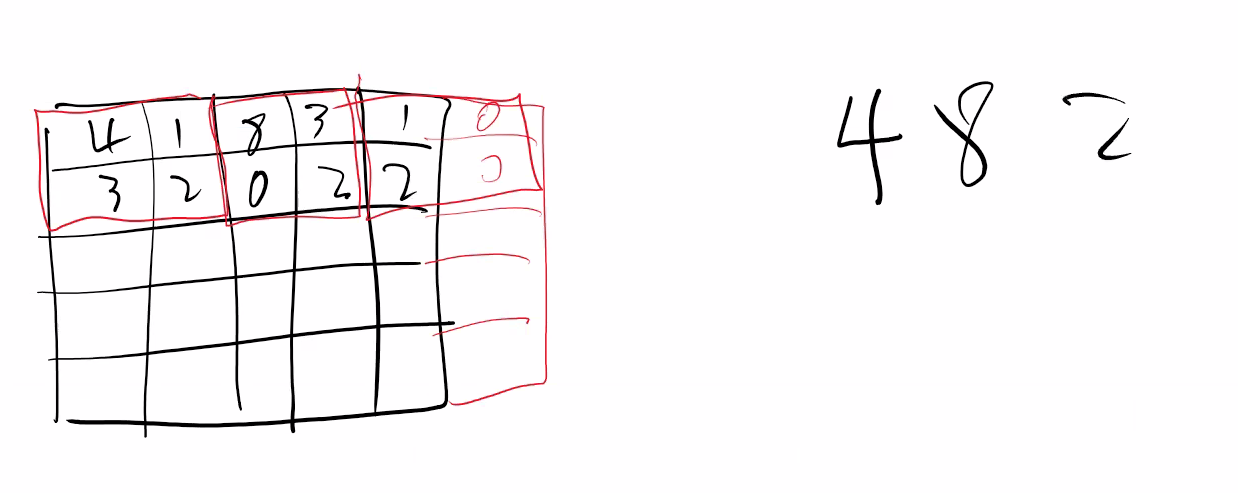

# MaxPool 코드까지의 과정 
### 이미지의 화질을 다소 떨어지나 특성을 도드라지게 함

 
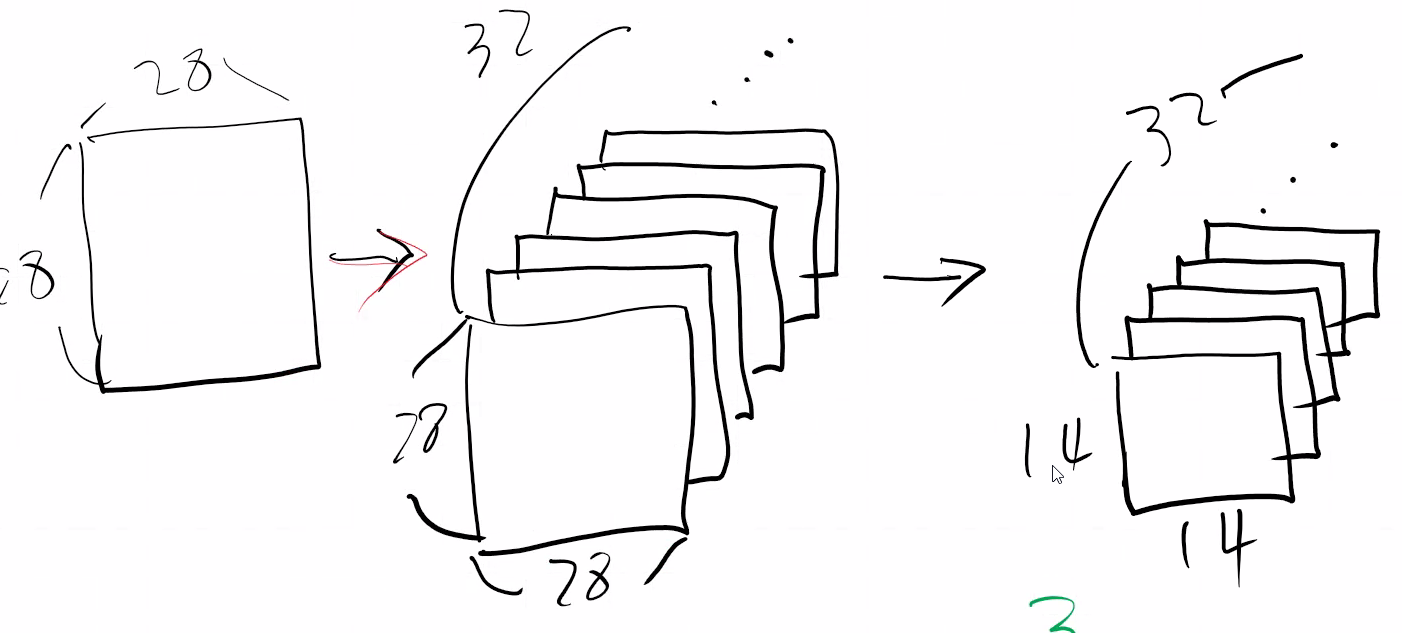

2번째 Conv2D를 거쳐 나온 이미지는 32개의 필터를 거쳐 나온 모든 이미지를 합친, 즉 하나의 새로운 이미지 32장 출력된다. (특성이 제일 도드라지는 이미지)
  
2번째 pooling까지 거치면 이미지는 더욱 적어지면 7X7 사이즈 이미지 32장이 나옴

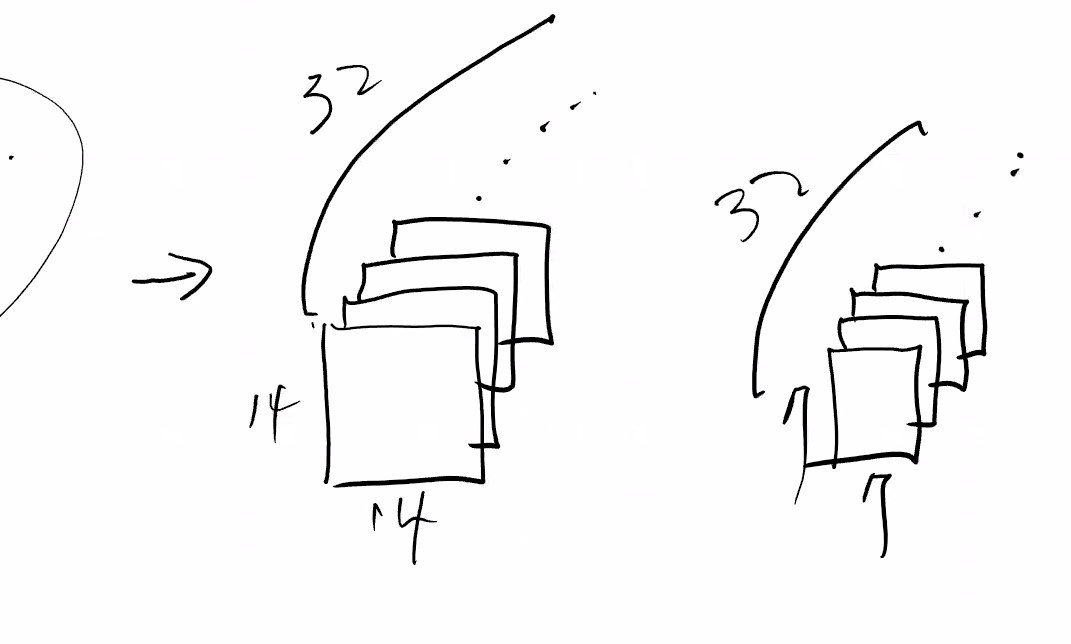

# Flatten 레이어의 역할  
  
Dense 레이어의 들어가기 전에 이미지 데이터를 한 줄로 늘어뜨리는 형식으로 reshape해준다

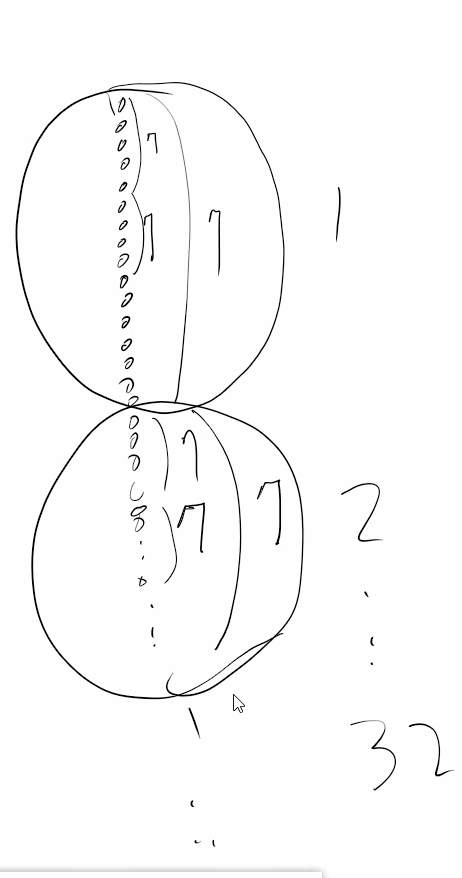

# 이미지 학습 요약

1. convolutions : 필터로 픽셀을 만듦
2. subsmapling : pooling 작업
3. f.maps : 특징만을 요약해서 만든 여러장의 이미지 feature maps
4. 반복
5. 최종 Fully connected : Dense층 돌입

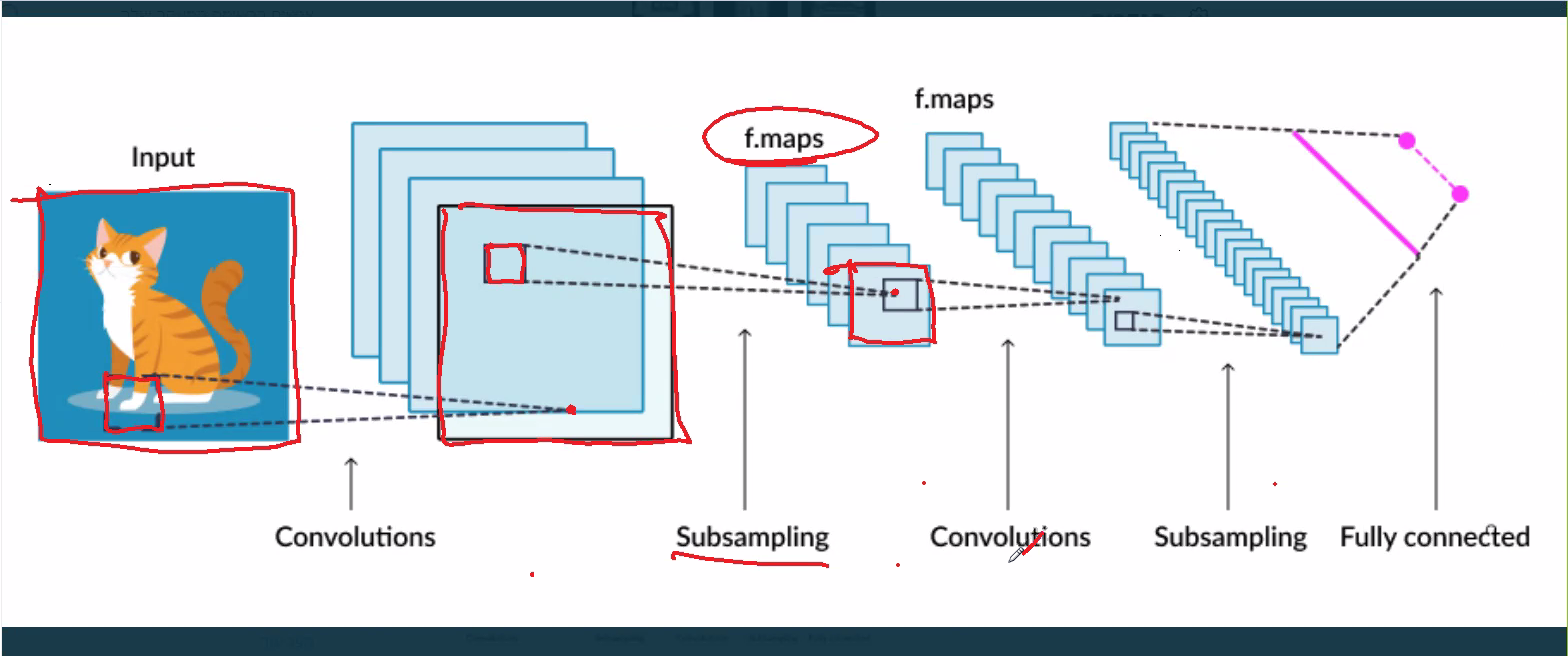

# 질문



1.   padding same을 안 주면 버려지는 건 항상 오른쪽, 아래쪽의 픽셀의 값? 그렇다

2.   conv2d를 32번 적용할 때 필터링된 결과들이 어떤 요인에 의해서 달라지는건가? 생성된 커널들이 뽑아낸 특성이 다 다르기 때문에 그것들의 차이




In [26]:
#모델 컴파일
opt = Adam(lr = 0.01)
#다중분류기에서는 loss로 categorical_crossentropy
model.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [27]:
#모델 학습
fit_hist = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 110s 107ms/step - loss: 0.4718 - accuracy: 0.8265 - val_loss: 0.3169 - val_accuracy: 0.8843
Epoch 2/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3330 - accuracy: 0.8760 - val_loss: 0.2966 - val_accuracy: 0.8887
Epoch 3/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3058 - accuracy: 0.8868 - val_loss: 0.2867 - val_accuracy: 0.8955
Epoch 4/10
375/375 [==============================] - 38s 102ms/step - loss: 0.2930 - accuracy: 0.8907 - val_loss: 0.2858 - val_accuracy: 0.8930
Epoch 5/10
375/375 [==============================] - 40s 106ms/step - loss: 0.2780 - accuracy: 0.8964 - val_loss: 0.2748 - val_accuracy: 0.8971
Epoch 6/10
375/375 [==============================] - 39s 104ms/step - loss: 0.2723 - accuracy: 0.8967 - val_loss: 0.2632 - val_accuracy: 0.8996
Epoch 7/10
375/375 [==============================] - 39s 104ms/step - loss: 0.2648 - accuracy: 0.9011 - val_loss: 0.2936 - val_a

In [28]:
#정확도 확인
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.9004999995231628


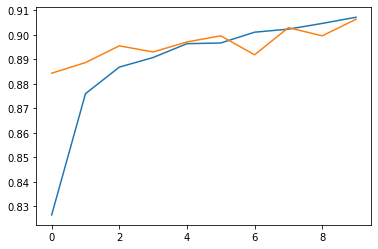

In [29]:
#시각화

plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

# 모델 사이즈를 키우면 정확도가 조금 더 향상 될 수 있음

trouser


ValueError: ignored

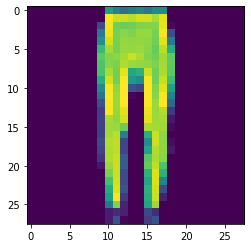

In [30]:
#sample 데이터로 test

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])

print(label[Y_test[my_sample]])

pred = model.predict(x_test[my_sample].reshape(-1, 784))

print(pred)
print(label[np.argmax(pred)])

In [ ]:
#argmax는 리스트 중 max 값의 최대값의 인덱스를 반환해 줌
#argmax 예시
a = [1, 4, 8, 3, 7, 2]
np.argmax(a)

2